In [23]:
#Import packages
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import matplotlib.style as style
pd.set_option('display.max_columns', 500)
%matplotlib inline
style.use('fivethirtyeight')



In [25]:

nba = pd.read_csv('data/nba_stats_info2.csv', index_col = 0)
ncaa = pd.read_csv('data/ncaa_stats_info2.csv', index_col = 0)

C:\Users\Kaan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (86) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [26]:
grades = []
for x in ncaa.grade:
    if x in ('Fr','RS-Fr'):
        grades.append(1)
    elif x in ('So','RS-So'):
        grades.append(2)
    elif x in ('Jr','RS-Jr'):
        grades.append(3)
    else:
        grades.append(4)
        
ncaa.grade = grades
        

In [5]:
#filter nba data for players who played at least 15 games in a season
nba_played = nba.loc[nba.gp >= 20]

#filter college data for players who played at least 10 games in a season
ncaa_played = ncaa.loc[(ncaa.gp >= 15)]

#get rookie nba seasons
rookies = nba_played.loc[nba_played.season_count == 1]

#get last college season
last_college_stats = ncaa_played.groupby('name').last()

preNBA = last_college_stats.loc[(last_college_stats.highest_level_reached == 'NBA')]

In [6]:
print(len(rookies),len(last_college_stats))

rookies.sort_values('per', ascending =False).head(10)

629 7306


,realgm_summary_page,highest_level_reached,season,Team,TeamID,year,Abbr,gp,gs,mp,fgm,fga,fg_pct,fg3m,fg3a,fg3_pct,ftm,fta,ft_pct,oreb,dreb,reb,ast,stl,blk,pf,tov,pts,mp_tot,fgm_tot,fga_tot,fg3m_tot,fg3a_tot,ftm_tot,fta_tot,oreb_tot,dreb_tot,reb_tot,ast_tot,stl_tot,blk_tot,pf_tot,tov_tot,pts_tot,dbl_dbl,tpl_dbl,pts40,pts20,ast20,techs,hob,ast_to,stl_to,ft_fga,w,l,win_pct,ows,dws,ws,ts_pct,efg_pct,oreb_pct,dreb_pct,reb_pct,ast_pct,tov_pct,stl_pct,blk_pct,usg_pct,total_s_pct,ppr,pps,ortg,drtg,per,ff,season_count,realgm_link,id,name,pos,height,weight,final_school,dob_code,added_birthdays,bday,hometown,highest_level,rsci_year,rsci_rank,year247,rank247,max_pred_wingspan,avg_pred_wingspan,max_wingspan,avg_wingspan,last_cbb_year,ncaa_seasons (d-i),nba_seasons,intl_seasons,gl_seasons,sl_seasons,intl_before_college,sports-reference_id_1,sports-reference_id_2,Unnamed: 29,draft_year,pick,age,draft_age
904,/player/Joel-Embiid/Summary/49880,NBA,2016-17,Philadelphia-Sixers,22.0,2016,PHL,31,31,25.4,6.45,13.84,0.466,1.16,3.16,0.367,6.16,7.87,0.783,1.97,5.84,7.81,2.13,0.87,2.42,3.61,3.77,20.23,786.0,200,429,36,98,191,244,61,181,242,66,27,75,112,117,627,9,0,0,0,0,2,0.234,0.56,0.23,0.57,13,18,0.419,0.51,1.70,2.21,0.584,0.508,8.59,24.72,16.78,16.77,17.91,1.69,7.74,36.11,161.63,-9.14,1.46,103.2,99.4,24.10,6.4842,1,/player/Joel-Embiid/Summary/49880,49880,Joel Embiid,C,84,250,Kansas,19940316.0,NaN,3/16/1994,Yaounde,NBA,2013.0,23.0,2013.0,14.0,86.52,86.52,89,89,2014.0,1,2,0,0,0,NaN,/cbb/players/joel-embiid-1.html,NaN,NaN,2014.0,3.0,22.561644,20.558904
1100,/player/Karl-Anthony-Towns/Summary/39311,NBA,2015-16,Minnesota-Timberwolves,17.0,2015,MIN,82,82,32.0,7.62,14.05,0.543,0.37,1.07,0.341,2.72,3.35,0.811,2.76,7.67,10.43,1.96,0.71,1.68,2.99,2.23,18.33,2626.1,625,1152,30,88,223,275,226,629,855,161,58,138,245,183,1503,51,0,0,1,0,3,0.254,0.88,0.32,0.24,29,53,0.354,5.44,2.74,8.17,0.590,0.556,10.13,27.49,18.92,11.34,12.57,1.11,4.29,24.85,169.44,-2.90,1.30,112.0,106.3,22.45,5.4269,1,/player/Karl-Anthony-Towns/Summary/39311,39311,Karl-Anthony Towns,C,84,244,Kentucky,19951115.0,NaN,11/15/1995,Metuchen (NJ),NBA,2014.0,7.0,2014.0,5.0,85.43,85.43,87.5,87.42,2015.0,1,3,0,0,1,NaN,/cbb/players/karl-anthony-towns-1.html,NaN,NaN,2015.0,1.0,19.890411,19.890411
4077,/player/Kenneth-Faried/Summary/2303,NBA,2011-12,Denver-Nuggets,7.0,2011,DEN,46,39,22.5,3.93,6.72,0.586,0.00,0.00,0.000,2.37,3.57,0.665,3.09,4.57,7.65,0.78,0.74,1.02,2.52,1.17,10.24,1037.3,181,309,0,0,109,164,142,210,352,36,34,47,116,54,471,12,0,0,0,0,2,0.118,0.67,0.63,0.53,27,19,0.587,3.31,1.13,4.44,0.618,0.586,16.47,22.97,19.82,5.34,12.41,1.67,3.62,18.54,125.04,-2.81,1.52,123.4,104.1,22.06,6.7104,1,/player/Kenneth-Faried/Summary/2303,2303,Kenneth Faried,F,80,228,Morehead State,19891119.0,NaN,11/19/1989,Newark (NJ),NBA,NaN,NaN,NaN,NaN,85.06,84.79,84,84,2011.0,4,7,0,0,1,NaN,/cbb/players/kenneth-faried-1.html,NaN,NaN,2011.0,22.0,21.879452,21.879452
4117,/player/Blake-Griffin/Summary/1596,NBA,2010-11,Los-Angeles-Clippers,12.0,2010,LAC,82,82,37.9,8.49,16.78,0.506,0.09,0.29,0.292,5.44,8.48,0.642,3.29,8.77,12.06,3.80,0.77,0.55,3.07,2.72,22.50,3111.5,696,1376,7,24,446,695,270,719,989,312,63,45,252,223,1845,63,2,2,0,0,12,0.334,1.40,0.28,0.51,32,50,0.390,6.45,3.22,9.67,0.549,0.508,10.24,26.87,18.62,18.73,11.71,1.05,1.13,27.32,143.92,-0.48,1.34,111.2,107.2,22.01,5.2552,1,/player/Blake-Griffin/Summary/1596,1596,Blake Griffin,PF,82,251,Oklahoma,19890316.0,NaN,3/16/1989,Oklahoma City (OK),NBA,2007.0,17.0,2007.0,16.0,85.46,85.08,83.25,83.25,2009.0,2,8,0,0,1,NaN,NaN,NaN,NaN,2009.0,1.0,21.558904,20.558904
2705,/player/Chris-Paul/Summary/61,NBA,2005-06,New-Orleans-Pelicans,19.0,2005,NOP,78,78,36.0,5.22,12.14,0.430,0.64,2.27,0.282,5.05,5.96,0.847,0.78,4.35,5.13,7.83,2.24,0.08,2.79,2.35,16.13,2808.7,407,947,50,177,394,465,61,339,400,611,175,6,218,183,1258,21,2,0,0,0,1,0.380,3.34,0.96,0.49,35,43,0.449,6.58,3.70,10.28,0.546,0.456,2.52,14.75,8.48,38.40,13.71,3.38,0.18,22.23,155.96,8.11,1.33,114.4,104.3,21.84,4.1874,1,/player/Chris

In [7]:
def rook_stats(stat):
    stat = pd.merge(preNBA[['id',stat]], 
                    rookies[['name',stat,'id']], on = 'id')
    return stat


def rook_plot(stat):
    statsdf = rook_stats(stat)
    corr = round(stats.pearsonr(statsdf[stat+'_x'], statsdf[stat+'_y'])[0],3)
    plt.scatter(statsdf[stat+'_x'], statsdf[stat+'_y'])
    plt.title('College vs. Rookie Season Avg. ' + str(stat).capitalize())
    plt.xlabel('Last College Season Avg. ' + str(stat).capitalize())
    plt.ylabel('Rookie Season NBA Avg. ' + str(stat).capitalize())
    plt.text(x = statsdf[stat+'_x'].min() , y = statsdf[stat+'_y'].max()*.95, s = 'Correlation = '+str(corr))

    



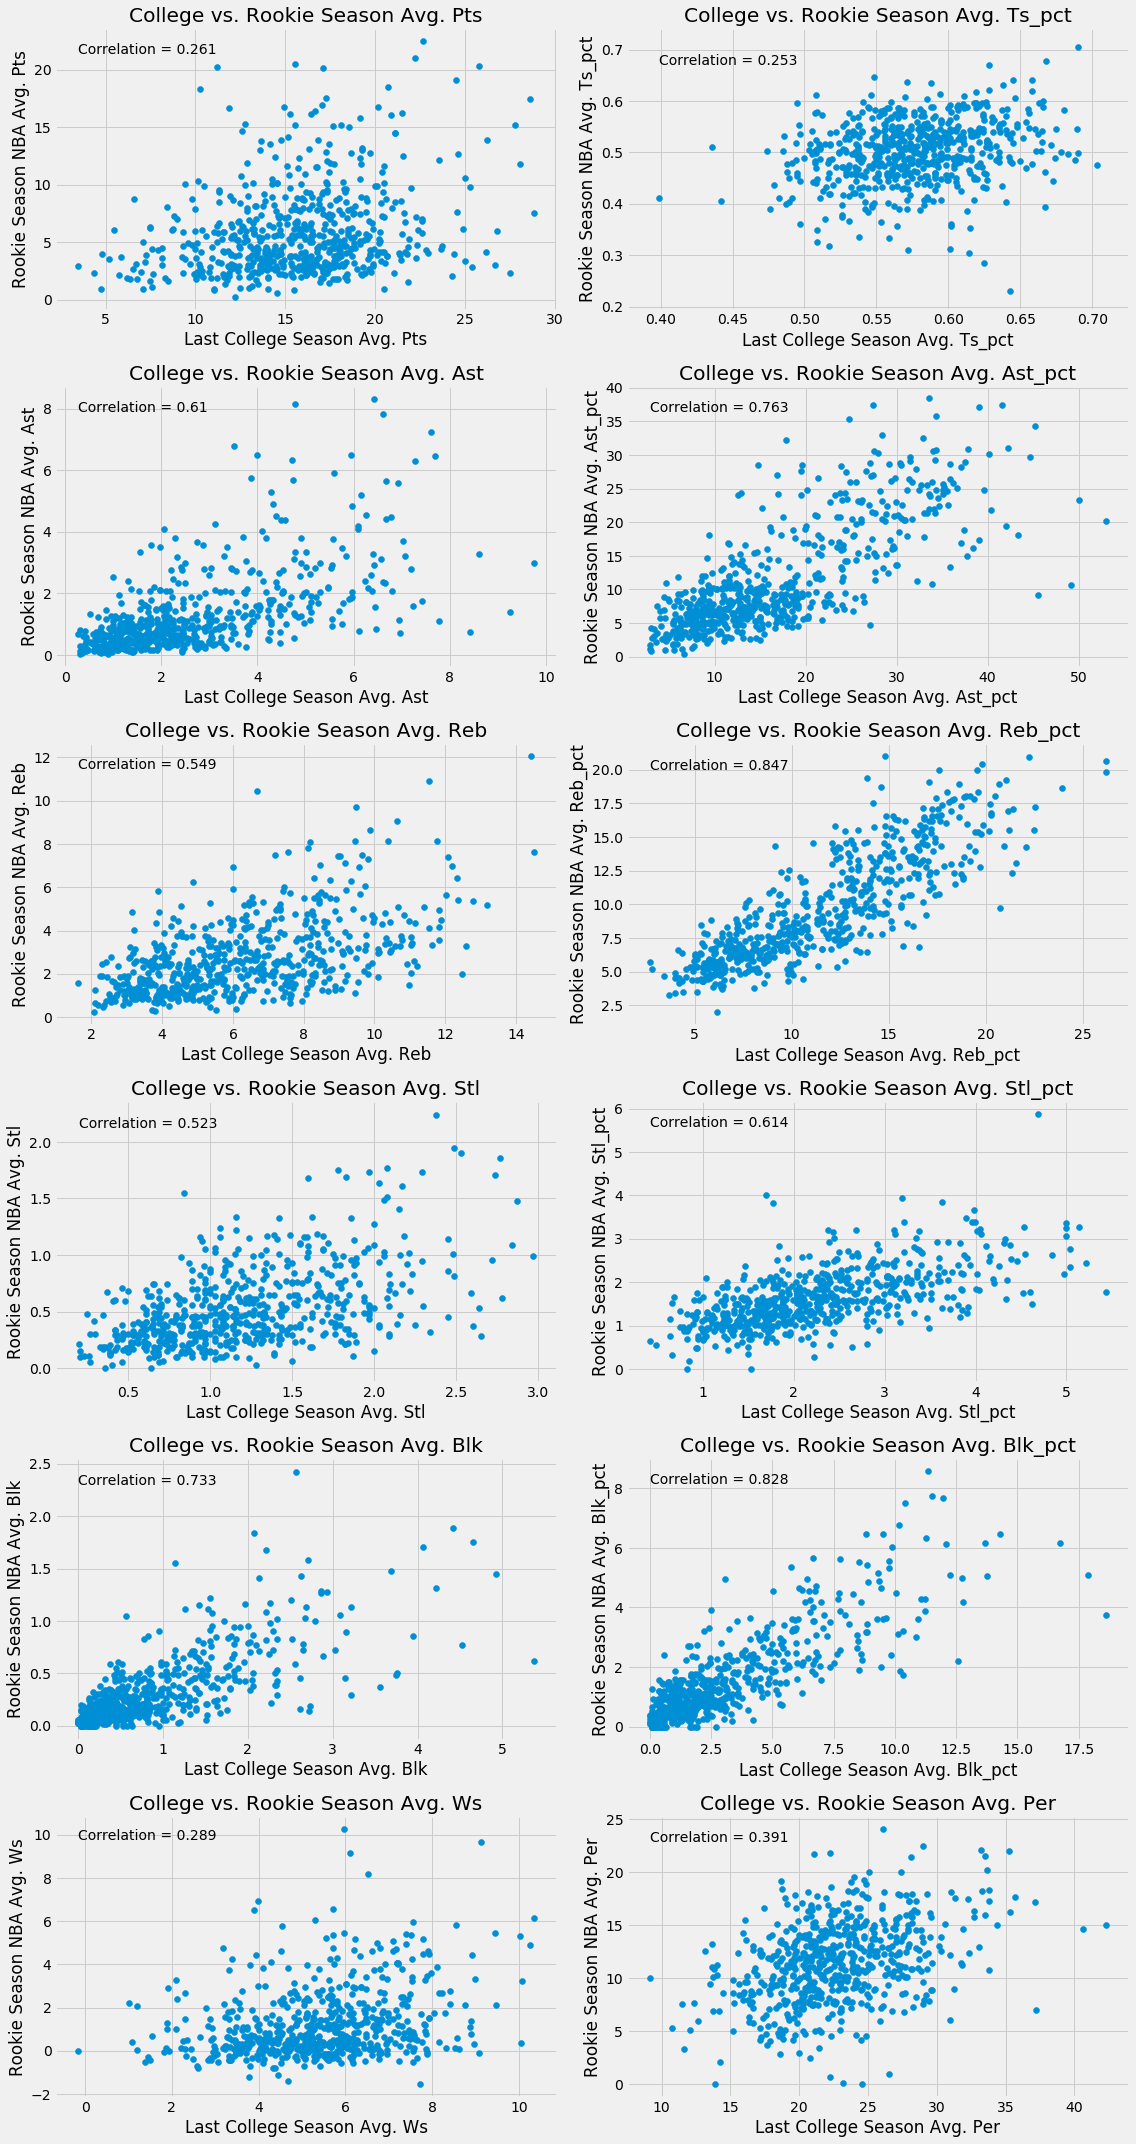

In [8]:
plot_stats = ['pts','ts_pct','ast','ast_pct','reb','reb_pct','stl','stl_pct','blk','blk_pct','ws','per']

plt.figure(figsize=(16,30))
plt.clf()
for i,stat in enumerate(plot_stats):
    plt.subplot(6,2,i+1)
    rook_plot(stat)
plt.tight_layout()
plt.show()

In [9]:
avg_rook_age = rookies[['draft_year','age','draft_age']].groupby('draft_year').mean().reset_index()
avg_rook_age

,draft_year,age,draft_age
0,2003.0,22.439621,22.362487
1,2004.0,22.110616,22.110616
2,2005.0,22.122316,22.122316
3,2006.0,21.917969,21.917969
4,2007.0,21.513301,21.480954
5,2008.0,21.464384,21.245548
6,2009.0,22.218313,22.007642
7,2010.0,21.734332,21.671832
8,2011.0,21.672936,21.645835
9,2012.0,21.721644,21.696644


Text(0.5,0,'Draft Year')

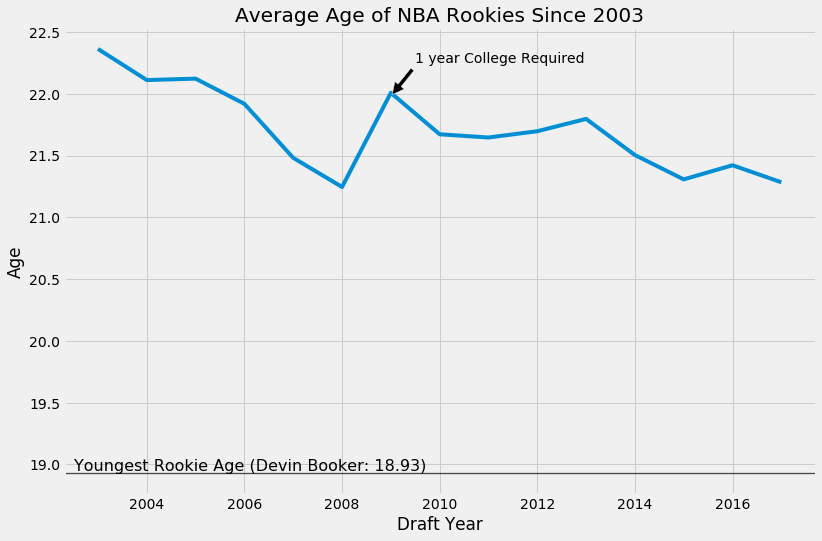

In [10]:
youngest_rook = round(rookies.age.min(),2)
plt.figure(figsize=(12,8))
plt.clf()
plt.plot(avg_rook_age.draft_year, avg_rook_age.draft_age)
plt.title('Average Age of NBA Rookies Since 2003')
plt.annotate('1 year College Required', xy=(2009,21.98), xytext=(2009.5,22.25),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.axhline(y = youngest_rook, color = 'black', linewidth = 1.3, alpha = .7)
plt.text(x = 2002.5, y = youngest_rook*1.001, s = 'Youngest Rookie Age (Devin Booker: {})'.format(youngest_rook), fontsize = 16)
plt.ylabel('Age')
plt.xlabel('Draft Year')

Questions to answer

    1) Average Age of draftees Overall
    2) Average Age of each pick in the draft over the years
    3) Correlation of PER, WS/40, Pts, Ast, Reb to draft position
    4) Trend of different draftee college stats over time
    5) Find highest correlated stat for rookie season and average of first 3, 5 seasons

In [11]:
pickAge = rookies[['pick','draft_age']].groupby('pick').mean().reset_index()
pickAge.head(10)

,pick,draft_age
0,1.0,20.054545
1,2.0,20.350685
2,3.0,20.324566
3,4.0,20.447032
4,5.0,21.192528
5,6.0,21.476961
6,7.0,20.887900
7,8.0,20.928376
8,9.0,20.847554
9,10.0,20.741096


Text(0.5,0,'Draft Year')

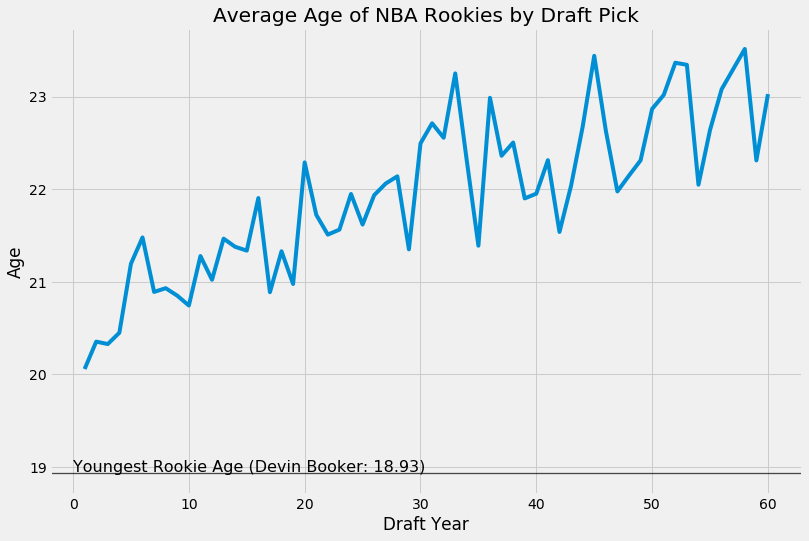

In [12]:
plt.figure(figsize=(12,8))
plt.clf()
plt.plot(pickAge.pick, pickAge.draft_age)
plt.title('Average Age of NBA Rookies by Draft Pick')
plt.axhline(y = youngest_rook, color = 'black', linewidth = 1.3, alpha = .7)
plt.text(x = 0, y = youngest_rook*1.001, s = 'Youngest Rookie Age (Devin Booker: {})'.format(youngest_rook), fontsize = 16)
plt.ylabel('Age')
plt.xlabel('Draft Year')

(array([ 4.,  1.,  1.,  3.,  3., 14., 14., 14., 21., 39., 36., 52., 46.,
        55., 43., 57., 47., 38., 43., 25., 19., 18., 18.,  5.,  3.,  1.,
         3.,  5.,  0.,  1.]),
 array([-1.00000000e-02,  7.93666667e-01,  1.59733333e+00,  2.40100000e+00,
         3.20466667e+00,  4.00833333e+00,  4.81200000e+00,  5.61566667e+00,
         6.41933333e+00,  7.22300000e+00,  8.02666667e+00,  8.83033333e+00,
         9.63400000e+00,  1.04376667e+01,  1.12413333e+01,  1.20450000e+01,
         1.28486667e+01,  1.36523333e+01,  1.44560000e+01,  1.52596667e+01,
         1.60633333e+01,  1.68670000e+01,  1.76706667e+01,  1.84743333e+01,
         1.92780000e+01,  2.00816667e+01,  2.08853333e+01,  2.16890000e+01,
         2.24926667e+01,  2.32963333e+01,  2.41000000e+01]),
 <a list of 30 Patch objects>)

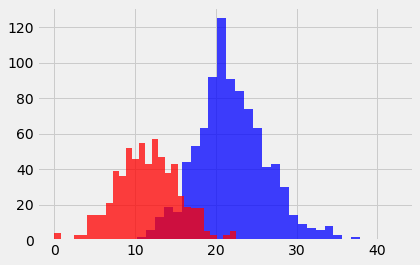

In [17]:
plt.hist(preNBA.per, bins = 30, alpha = .75, color = 'blue')
plt.hist(rookies.per, bins = 30, alpha = .75, color = 'red')

In [14]:
pts = last_college_stats.pts
pick = last_college_stats.pick

def stat_bins(rang)

print(len(last_college_stats.loc[((pts>=25) & (pick <99))]) / sum(pts>=25))
print(len(last_college_stats.loc[((pts.between(20,24.999) & (pick <99)))]) / sum(pts.between(20,24.999)))
print(len(last_college_stats.loc[((pts.between(15,19.999) & (pick <99)))]) / sum(pts.between(15,19.999)))
print(len(last_college_stats.loc[((pts.between(10,14.999) & (pick <99)))]) / sum(pts.between(10,14.999)))
print(len(last_college_stats.loc[((pts.between(5,9.999) & (pick <99)))]) / sum(pts.between(5,9.999)))
print(len(last_college_stats.loc[((pts.between(0,4.999) & (pick <99)))]) / sum(pts.between(0,4.999)))





SyntaxError: invalid syntax (<ipython-input-14-3f3c6c584bc0>, line 4)

In [21]:
rookies['age_rnd'] = rookies.age.round()
pd.pivot_table(rookies,values=['pts','reb','ast','stl','blk','per','ws'],columns = 'age_rnd')

C:\Users\Kaan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


age_rnd,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0
ast,1.272857,1.705783,1.6010,1.246463,1.058228,1.095075,0.705714,1.238182,1.660000,1.313333,0.920000,0.12
blk,0.506429,0.436506,0.3404,0.314898,0.248924,0.250896,0.307143,0.225455,0.200000,0.393333,0.110000,0.20
per,12.916429,12.484096,11.8269,11.980136,10.492595,10.862836,12.022857,9.220000,11.864286,10.613333,9.960000,12.53
pts,8.067857,8.247108,6.5981,6.176259,4.787342,4.477015,3.782381,3.975455,5.524286,4.570000,4.643333,0.92
reb,3.807500,3.700843,3.0183,2.708776,2.300190,2.352239,2.109524,1.624545,2.370000,2.016667,1.350000,1.04
stl,0.640714,0.662048,0.5977,0.523197,0.466329,0.439552,0.386667,0.449091,0.578571,0.543333,0.406667,0.16
ws,1.807500,1.890361,1.4114,1.374150,0.943354,0.859851,0.829048,0.713636,1.028571,0.636667,0.540000,0.21


(array([ 3.,  3.,  5., 18., 18., 27., 52., 44., 58., 72., 61., 66., 63.,
        58., 43., 30.,  6.,  2.]),
 array([69., 70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81.,
        82., 83., 84., 85., 86., 87.]),
 <a list of 18 Patch objects>)

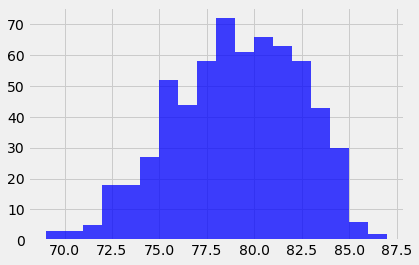

In [37]:
plt.hist(rookies.height, bins = 18, alpha = .75, color = 'blue')
